<a href="https://colab.research.google.com/github/Hyun-s/MLstudy/blob/master/Dacon_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dacon_mnist
그냥 일단 아무렇게나 만들어봄. 이거 연습용이라 convnet으로 구현하면 acc 올라갈듯 그리고 datagen 이거 찾아보셈 데이터증강인가 뭔가 하는건데 막 데이터들 돌리고 그러는거 이정도가 깔고가는 베이스인듯

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob

import random

import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_filename = '/content/drive/My Drive/data/train.csv'
test_filename = '/content/drive/My Drive/data/test.csv'

In [4]:
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

In [5]:
train_data.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [6]:
train_labels = train_data['digit']
train_letter = train_data['letter']
train_id = train_data['id']
test_id = test_data['id']
train_data = train_data.drop(['digit','letter','id'],axis=1)
test_data =test_data.drop(['letter','id'],axis = 1)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,1,2,4,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,2,3,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,1,3,3,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,4,7,22,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,2,3,2,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [8]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,4,4,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,3,0,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,1,0,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,3,4,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,4,2,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [9]:
def arrtoimg(data,x):
  tmp =data[x:x+1]
  tmp = np.array(tmp)
  tmp=tmp.reshape(28,28)
  image = Image.fromarray(tmp.astype('uint8'), 'L') 
  large = image.resize((200,200))
  return large

In [10]:
def showimg(data , x):
  plt.imshow(arrtoimg(data,x))
  plt.title(str(train_labels[x])+' , '+str(train_letter[x]))
  plt.axis("off")
  plt.show

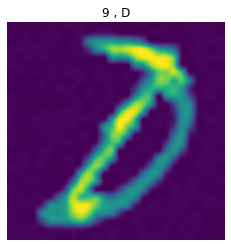

In [11]:
showimg(train_data,3)

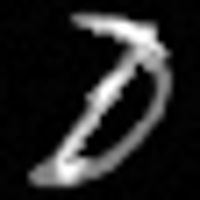

In [12]:
arrtoimg(train_data,3)

이거는 그냥 연한 부분이 letter라 연한부분 아예 삭제해버려서  한번 해봄

In [13]:
train_data_ex = []
for x in range(0,len(train_data)):
  tmp =train_data[x:x+1]
  tmp = np.array(tmp)
  tmp2 = np.where(tmp<150,0,tmp)
  train_data_ex.append(tmp2.flatten())
test_data_ex = []
for x in range(0,len(test_data)):
  tmp =test_data[x:x+1]
  tmp = np.array(tmp)
  tmp2 = np.where(tmp<150,0,tmp)
  test_data_ex.append(tmp2.flatten())

make label

In [14]:
train_labels = keras.utils.to_categorical(train_labels)

In [15]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_data_ex = np.array(train_data_ex)
test_data_ex = np.array(test_data_ex)

# make model
여기서 모델을 어떻게 만드느냐가 중요한듯
이건 그냥 개간단한 3층짜리

In [16]:

inputs = keras.Input(shape=(train_data_ex[0].shape))
h = layers.Dense(128,activation='relu')(inputs)
h = layers.Dense(64,activation='relu')(h)
h = layers.Dense(32,activation='relu')(h)
outputs = layers.Dense(10,activation='softmax')(h)

model = keras.Model(inputs = inputs,outputs = outputs)

In [17]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
EPOCHS = 40

history = model.fit(
    train_data_ex,train_labels,
    epochs = EPOCHS
)

Epoch 1/40
64/64 [==============================] - 0s 2ms/step - loss: 12.1210 - accuracy: 0.1855
Epoch 2/40
64/64 [==============================] - 0s 2ms/step - loss: 3.1342 - accuracy: 0.2964
Epoch 3/40
64/64 [==============================] - 0s 2ms/step - loss: 1.8854 - accuracy: 0.4375
Epoch 4/40
64/64 [==============================] - 0s 2ms/step - loss: 1.3313 - accuracy: 0.5508
Epoch 5/40
64/64 [==============================] - 0s 2ms/step - loss: 1.0515 - accuracy: 0.6421
Epoch 6/40
64/64 [==============================] - 0s 2ms/step - loss: 0.8315 - accuracy: 0.7192
Epoch 7/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7817
Epoch 8/40
64/64 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8286
Epoch 9/40
64/64 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8657
Epoch 10/40
64/64 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8975
Epoch 11/40
64/64 

# predict
예측 부분
이때 predictions = [0,0,0,0,0,0,1,0,0,0]
이 숫자들은 각 label일 확률, 그래서 가장 높은 값으로 바꾸는 부분이 argmax

In [19]:
predictions = model.predict(test_data_ex)

In [20]:
np.argmax(predictions[0])
final=[]
for x in predictions:
    final.append(np.argmax(x))

In [21]:
my_first_submission = pd.DataFrame({"id": test_id,
                                    "digit": final})

In [22]:
my_first_submission.to_csv('/content/drive/My Drive/data/0805.csv',index=False) #0.43137

이거 일단 제출할라고 했는데 공부하면서 많이 수정될거 같음 대충 케라스 코드는 이렇게 짜지는 듯 한데 혼자 독학한거라 맞는줄도 모르겠다